<a href="https://colab.research.google.com/github/priyanshiyadavnitsgr/Computer-Vision/blob/master/Measuring_the_size_of_objects.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Links:
Google colab: https://colab.research.google.com/drive/1yME7qY30WBfkLYukM3QhGEsJ4nYO1P8V

Image: https://drive.google.com/file/d/1kzTjOKteszxlEvG9JyTkmC1Dbbc0Qigv/view?usp=sharing

In [0]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [0]:
from scipy.spatial import distance as dist
from imutils import perspective
from imutils import contours
import imutils


In [0]:
def image_preprocessing(image, kernel=(11, 11), thres1=100, thres2=100):
  ##This function processes the image.
  
  
  ## Firtly we convert it into gray image to decrease the complexity.
  gray = cv2.cvtColor(image.copy(), cv2.COLOR_BGR2GRAY)
  ## Then we use GaussianBlur() to blur the image in order to give importance to the sharp edges.
  ## Kernel is the size of kernel we want to use
  blur = cv2.GaussianBlur(gray, kernel, -1)

  ## Canny() is used for extracting the edges.
  ## The parameters for thres1 and thres2 are to be changed as per prequired
  edged = cv2.Canny(blur, thres1, thres2)
  
  ## Refer https://docs.opencv.org/2.4/doc/tutorials/imgproc/erosion_dilatation/erosion_dilatation.html for erosion and dilation.
  edged = cv2.dilate(edged, None, iterations=1)
  edged = cv2.erode(edged, None, iterations=1)

  cv2_imshow(edged)
  return edged

In [0]:
def contour_extraction(image):
  ##Contours have a major role in fetching distances.
  _, cnts, hierarchy= cv2.findContours(image.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE) 
  
  return cnts
  

In [0]:
def fetching_specific_contours(image, contours, minContourArea=0, maxContourArea=500000):
  ##Out of all the contours, we get our desired contour by using the attribute ContourArea().
  ##The limit to the contourArea are set using minimum and maximum contourArea.
  cnts_ = [x for x in contours if cv2.contourArea(x) > minContourArea and  cv2.contourArea(x) < maxContourArea ]

  cv2_imshow(cv2.drawContours(image.copy(), cnts_, -1, (255,0,0), 2))
  
  return cnts_


In [0]:
def setting_the_reference_length(image, contour, real_world_distance, vertical=110):
  ## We are here working with the horizontal distances.
  ## We grab the required contour. 

  ## extracting the x coodinates of all the contours.
  c=[i[0][0] for i in contour[0]]
  
  ## Get it's minimum and maximum x coordinate.
  right_end=np.max(c)
  left_end=np.min(c)
  
  ## Vertical is the y co-ordinate for drawing the line.
  ## Verical height can be calculated:
  ##    c=[i[0][0] for i in cnt[0]]
  ##    c1=[i[0][1] for i in cnt[0]]
  ##    vertical=c1[c.index(left_end)]
  ##This height is not always correct due to the presence multiple entries of left_end in list c.
  
  ## Now we calculate the distance between the right-end and the left-end of the image.
  pixel_distance = right_end-left_end
  
  ## We set the real world distance.
  real_distance = real_world_distance
  
  ## We here calculate the ratio of pixel_distance to real_diatance.
  ## Since this ratio will remain fixed for all the objects inside the image, we can use this parameter to determine the real_distance.

  pixel_per_cm=pixel_distance/real_distance
  
  ##Drawing the line joining left-end's and right-end's x-coordinate and vertical as the y-coordinate.
  im=cv2.line(cv2.drawContours(image.copy(), contour, -1, (255,0,0), 2), (left_end, vertical), (right_end, vertical), (0,255,255), 2)
  
  ##Displaying the distance.
  cv2_imshow(cv2.putText(im, "{:.2f}cm".format(real_distance), (left_end+10, vertical-10), cv2.FONT_HERSHEY_SIMPLEX, 0.65, (0, 255, 255), 2))

  
  return pixel_per_cm

  

In [0]:
def calculating_the_distance(image, contour, pixel_per_cm, vertical):
  ## We are here working with the horizontal distances.
  ## We grab the required contour. 

  ## extracting the x coodinates of all the contours.
  c=[i[0][0] for i in contour[0]]
  
  ## Get it's minimum and maximum x coordinate.
  right_end=np.max(c)
  left_end=np.min(c)
  
  ## Vertical is the y co-ordinate for drawing the line.
  ## Verical height can be calculated:
  ##    c=[i[0][0] for i in cnt[0]]
  ##    c1=[i[0][1] for i in cnt[0]]
  ##    vertical=c1[c.index(left_end)]
  ##This height is not always correct due to the presence multiple entries of left_end in list c.
  
  ## Now we calculate the distance between the right-end and the left-end of the image.
  pixel_distance = right_end-left_end
  
  ## Since this ratio will remain fixed for all the objects inside the image, we can use this parameter to determine the real_distance.

  real_distance=pixel_distance/pixel_per_cm
  
  ##Drawing the line joining left-end's and right-end's x-coordinate and vertical as the y-coordinate.
  im=cv2.line(cv2.drawContours(image.copy(), contour, -1, (255,0,0), 2), (left_end, vertical), (right_end, vertical), (0,255,255), 2)
  
  ##Displaying the distance.
  cv2_imshow(cv2.putText(im, "{:.2f}cm".format(real_distance), (left_end+10, vertical-10), cv2.FONT_HERSHEY_SIMPLEX, 0.65, (0, 255, 255), 2))

  

## Weight


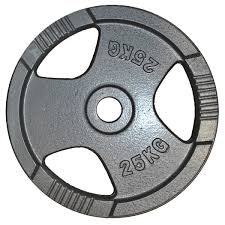

In [0]:
weight = cv2.imread('/content/weight.jpg')
cv2_imshow(weight)

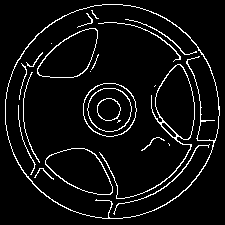

In [0]:
edged_image = image_preprocessing(weight)

In [0]:
contours=contour_extraction(edged_image)


In [0]:
## View all the contour areas 
v=[cv2.contourArea(x) for x in contours]
v

[13.5,
 2005.0,
 1953.0,
 46.0,
 0.0,
 12.0,
 1.5,
 10.5,
 405.5,
 387.0,
 1495.5,
 1460.5,
 0.0,
 2241.5,
 2196.5,
 11.5,
 0.0,
 2201.0,
 80.0,
 1979.5,
 6.5,
 4.0,
 12.5,
 0.0,
 1881.5,
 1832.5,
 27.5,
 28.5,
 9.0,
 5.0,
 36029.0,
 35812.0]

### we will be fetching the outer-most boundary of the weight and set it's diameter as 4.50cm.

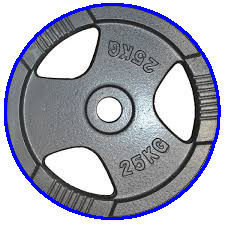

In [0]:
contour=fetching_specific_contours(weight, contours, minContourArea=36000)

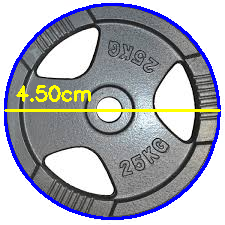

47.55555555555556


In [0]:
pixel_per_cm=setting_the_reference_length(weight, contour, 4.50, 110)
print(pixel_per_cm)

### Now we are going to find out the lengths of the variour other parts of the piston.

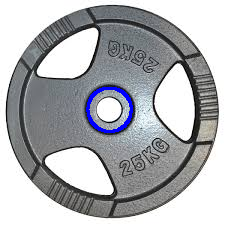

In [0]:
contour=fetching_specific_contours(weight, contours, 1000, 1800)

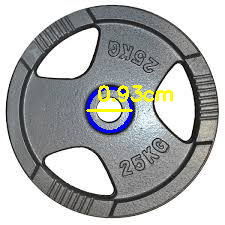

In [0]:
calculating_the_distance(weight, contour, pixel_per_cm, 110)

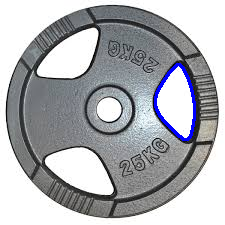

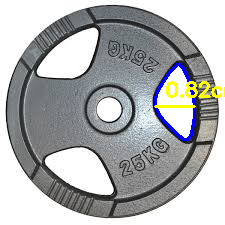

In [0]:
calculating_the_distance(weight, fetching_specific_contours(weight, contours, 1970, 2000), pixel_per_cm, 106)